# Task: Restaurant Reviews

**LEVEL-3 (Task-1)

**Analyze the text reviews to identify the most common positive and negative keywords.

In [2]:
import pandas as pd

data = pd.read_csv("Dataset.csv")
df = pd.DataFrame(data)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [4]:
print(df.duplicated().sum())

0


In [5]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [6]:
df.dropna(inplace=True)

In [8]:
from nltk.tokenize import word_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer
from collections import Counter
import nltk
nltk.download('punkt')
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Niranjan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Niranjan\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [9]:
all_texts = []
for review in df['Rating text']:
    tokens = word_tokenize(str(review).lower())
    all_texts.extend(tokens)

In [10]:
sia = SentimentIntensityAnalyzer()
df['Votes'] = df['Rating text'].apply(lambda x: sia.polarity_scores(str(x))['compound'])

In [11]:
positive_reviews = df[df['Votes'] > 0]['Rating text']
negative_reviews = df[df['Votes'] < 0]['Rating text']

positive_keywords = [word for review in positive_reviews for word in word_tokenize(str(review).lower())]
negative_keywords = [word for review in negative_reviews for word in word_tokenize(str(review).lower())]

In [12]:
most_positive_keywords = Counter(positive_keywords).most_common(10)
most_negative_keywords = Counter(negative_keywords).most_common(10)

In [14]:
print("Most Positive Keywords")
print(most_positive_keywords)
print()
print("Most Negative Keywords")
print(most_negative_keywords)

Most Positive Keywords
[('good', 3174), ('very', 1078), ('excellent', 300)]

Most Negative Keywords
[('poor', 186)]


**Calculate the average length of reviews and explore if there is a relationship between review length and rating.

In [16]:
df['review_length'] = df['Rating text'].apply(len)
average_review_length = df['review_length'].mean()

print(f'Average Review Length: {average_review_length:.2f} characters')

Average Review Length: 7.02 characters


In [17]:
correlation = df['review_length'].corr(df['Aggregate rating'])
print(f'Correlation between review length and rating: {correlation:.2f}')

Correlation between review length and rating: -0.48


**Correlation between review length and rating is -0.48, Hence it is moderate negative relationship.

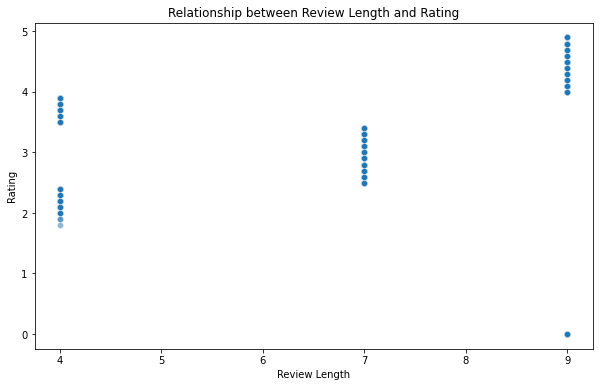

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x='review_length', y='Aggregate rating', data=df, alpha=0.5)
plt.title('Relationship between Review Length and Rating')
plt.xlabel('Review Length')
plt.ylabel('Rating')
plt.show()

# Task: Votes Analysis

**LEVEL-3 (Task-2)

**Identify the restaurants with the highest and lowest number of votes.

In [21]:
import pandas as pd

data = pd.read_csv("Dataset.csv")
df = pd.DataFrame(data)

In [22]:
df.isnull().sum()

df.dropna(inplace=True)

In [26]:
highest_votes_restaurant = df[df['Votes'] == df['Votes'].max()]
print("Restaurant with the highest number of votes:")
print(highest_votes_restaurant[['Restaurant Name', 'Votes']])

Restaurant with the highest number of votes:
    Restaurant Name  Votes
728            Toit  10934


In [27]:
lowest_votes_restaurant = df[df['Votes'] == df['Votes'].min()]
print("\nRestaurant with the lowest number of votes:")
print(lowest_votes_restaurant[['Restaurant Name', 'Votes']])


Restaurant with the lowest number of votes:
                 Restaurant Name  Votes
69              Cantinho da Gula      0
874                The Chaiwalas      0
879           Fusion Food Corner      0
880                Punjabi Rasoi      0
887                Baskin Robbin      0
...                          ...    ...
9044               6 Packs Momos      0
9098                   Cafe' Wow      0
9099  Chef's Basket Pop Up Caf��      0
9103            The Hangout-Deli      0
9111                    Platters      0

[1094 rows x 2 columns]


**Analyze if there is a correlation between the number of votes and the rating of a restaurant.

In [29]:
relationship = df['Votes'].corr(df['Aggregate rating'])
print(f'Correlation between Votes and Rating: {relationship:.2f}')

Correlation between Votes and Rating: 0.31


**Correlation between Votes and rating is 0.31, Hence it is positive relationship.

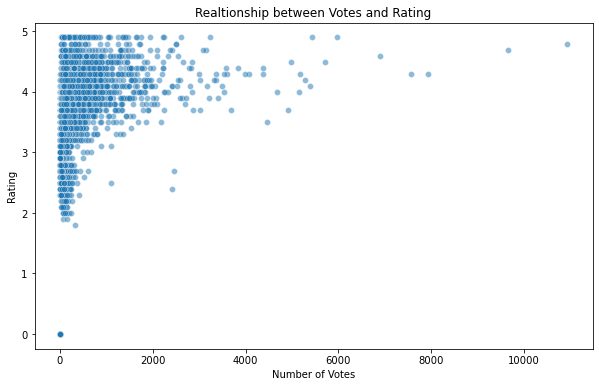

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Votes', y='Aggregate rating', data=df, alpha=0.5)
plt.title('Realtionship between Votes and Rating')
plt.xlabel('Number of Votes')
plt.ylabel('Rating')
plt.show()